In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('mill.csv')
print(df.head(20))

   Unnamed: 0  case  run    VB  time   DOC  feed  material     smcAC  \
0       row_0     1    1  0.00     2  1.50   0.5         1 -0.017090   
1       row_1     1    2   NaN     4  1.50   0.5         1  0.307617   
2       row_2     1    3   NaN     6  1.50   0.5         1 -0.725098   
3       row_3     1    4  0.11     7  1.50   0.5         1  0.112305   
4       row_4     1    5   NaN    11  1.50   0.5         1 -0.122070   
5       row_5     1    6  0.20    15  1.50   0.5         1  0.329590   
6       row_6     1    7  0.24    19  1.50   0.5         1 -0.578613   
7       row_7     1    8  0.29    22  1.50   0.5         1  0.300293   
8       row_8     1    9  0.28    26  1.50   0.5         1 -0.305176   
9       row_9     1   10  0.29    29  1.50   0.5         1  0.214844   
10     row_10     1   11  0.38    32  1.50   0.5         1 -0.595703   
11     row_11     1   12  0.40    35  1.50   0.5         1  0.229492   
12     row_12     1   13  0.43    38  1.50   0.5         1 -0.59

# TIME SERIES ANALYSIS
Time series analysis is a statistical technique used to analyze data points recorded at regular time intervals. (fonte:https://it.mathworks.com/discovery/time-series-analysis.html)

modifications:
1. each case changes either because they change material, feed rate or depth of cut. VHIT always does the same operation in the same way. For this reason, I selected only one case, the longest to keep homogenous DOC, material and feed
2. time steps are not homogenous or regular --> changed it to allow for time series analysis
3. since only vibration is of interest, I created a dataset with only vibration

the reported vibration is the RMS during the acquisition interval

In [3]:
df_11 = df.loc[df['case']==11]
df_11

,Unnamed: 0,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
71,row_71,11,1,0.00,1,0.75,0.25,1,-0.244141,1.352539,0.070801,0.289307,0.126953,0.164185
72,row_72,11,2,0.04,3,0.75,0.25,1,-0.654297,1.313477,0.070801,0.301514,0.149536,0.181274
73,row_73,11,3,0.07,10,0.75,0.25,1,-0.214844,1.411133,0.070801,0.269775,0.092773,0.121460
74,row_74,11,4,0.07,12,0.75,0.25,1,0.263672,1.391602,0.061035,0.286865,0.098877,0.115356
75,row_75,11,5,0.08,14,0.75,0.25,1,-0.605469,1.342773,0.065918,0.296631,0.121460,0.144653
76,row_76,11,6,0.09,17,0.75,0.25,1,0.341797,1.411133,0.070801,0.284424,0.101929,0.123901
77,row_77,11,7,NaN,19,0.75,0.25,1,0.214844,1.406250,0.068359,0.274658,0.085449,0.101318
78,row_78,11,8,0.12,21,0.75,0.25,1,-0.366211,1.416016,0.065918,0.321045,0.096436,0.115356
79,row_79,11,9,0.16,27,0.75,0.25,1,-0.678711,1.352539,0.063477,0.294189,0.106812,0.127563
80,row_80,11,10,0.18,33,0.75,0.25,1,-0.463867,1.381836,0.070801,0.290527,0.100708,0.122681


In [4]:
df_timeseries = df_11.loc[:,['time','vib_spindle']]
df_timeseries

,time,vib_spindle
71,1,0.289307
72,3,0.301514
73,10,0.269775
74,12,0.286865
75,14,0.296631
76,17,0.284424
77,19,0.274658
78,21,0.321045
79,27,0.294189
80,33,0.290527


In [5]:
df_timeseries.set_index(pd.to_datetime(df_timeseries['time'], unit='s'), inplace=True)
df_timeseries.drop('time', axis=1, inplace=True)

In [6]:
df_timeseries

,vib_spindle
time,
1970-01-01 00:00:01,0.289307
1970-01-01 00:00:03,0.301514
1970-01-01 00:00:10,0.269775
1970-01-01 00:00:12,0.286865
1970-01-01 00:00:14,0.296631
1970-01-01 00:00:17,0.284424
1970-01-01 00:00:19,0.274658
1970-01-01 00:00:21,0.321045
1970-01-01 00:00:27,0.294189


In [7]:
#linear interpolation
df_timeseries_interpolated = df_timeseries.resample('1S').interpolate(method = 'linear')
df_timeseries_interpolated

/tmp/ipython-input-7-3454010673.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_timeseries_interpolated = df_timeseries.resample('1S').interpolate(method = 'linear')


,vib_spindle
time,
1970-01-01 00:00:01,0.289307
1970-01-01 00:00:02,0.295410
1970-01-01 00:00:03,0.301514
1970-01-01 00:00:04,0.296980
1970-01-01 00:00:05,0.292446
...,...
1970-01-01 00:01:41,0.275879
1970-01-01 00:01:42,0.272217
1970-01-01 00:01:43,0.268555


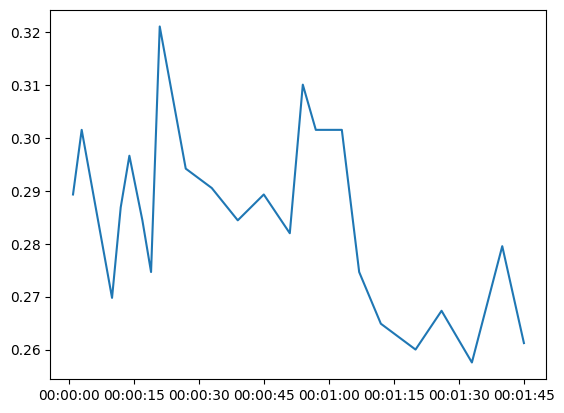

In [8]:
plt.plot(df_timeseries_interpolated['vib_spindle'])

let's choose the appropriate time series model: ARMA vs ARIMA
to do so, let's check stationarity with the ADF test
if p > 0.05: non-stationary --> so we need to use ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
vibration = df_timeseries_interpolated['vib_spindle']
result = adfuller(vibration)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.9066453259812157
p-value: 0.3289414265834528


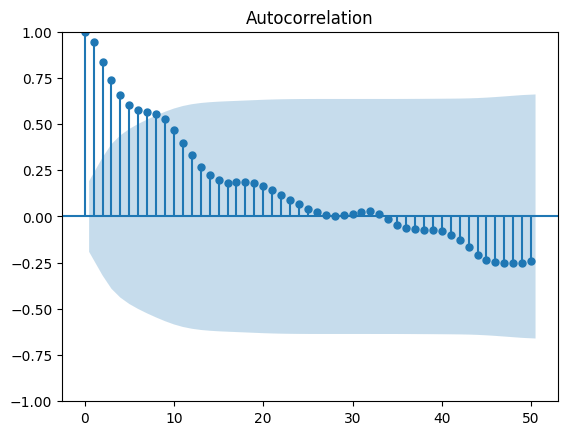

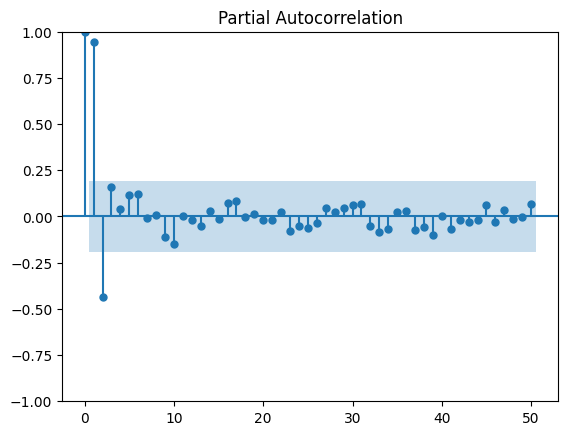

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(vibration, lags=50)
plot_pacf(vibration, lags=50)
plt.show()

Since it is not stationary, we differentiate the time series so that it becomes stationary

In [9]:
#since it is not stationary, we need to make it stationary by differentiation
df_timeseries_interpolated_diff = df_timeseries_interpolated.diff()
df_timeseries_interpolated_diff = df_timeseries_interpolated_diff[1:]
df_timeseries_interpolated_diff = df_timeseries_interpolated_diff.reset_index()
df_timeseries_interpolated_diff = df_timeseries_interpolated_diff.rename(columns = {0: 'list'})
df_timeseries_interpolated_diff.index.name = 'index'
df_timeseries_interpolated_diff

,time,vib_spindle
index,,
0,1970-01-01 00:00:02,0.006104
1,1970-01-01 00:00:03,0.006104
2,1970-01-01 00:00:04,-0.004534
3,1970-01-01 00:00:05,-0.004534
4,1970-01-01 00:00:06,-0.004534
...,...,...
99,1970-01-01 00:01:41,-0.003662
100,1970-01-01 00:01:42,-0.003662
101,1970-01-01 00:01:43,-0.003662


now we run again the test to see if it stationary after differentiation.

very small p-value --> stationary.

we can perform ARIMA setting d = 1

In [ ]:
ADF_test = adfuller(df_timeseries_interpolated_diff['vib_spindle'])
print("ADF Statistic:", ADF_test[0])
print("p-value:", ADF_test[1])

ADF Statistic: -7.295304581462537
p-value: 1.3829646588434905e-10


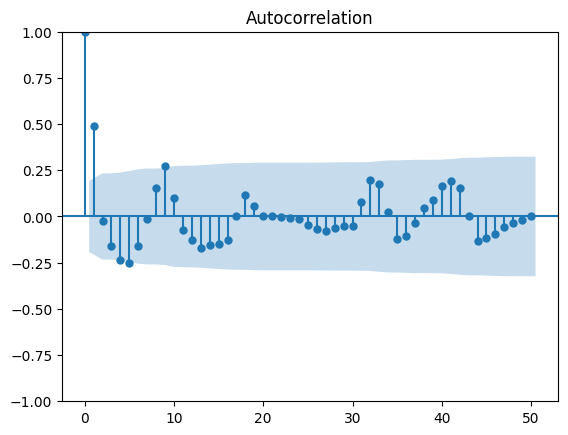

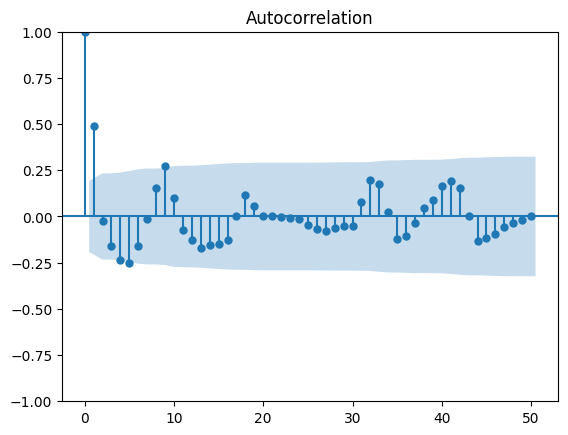

In [ ]:
plot_acf(df_timeseries_interpolated_diff['vib_spindle'], lags=50)

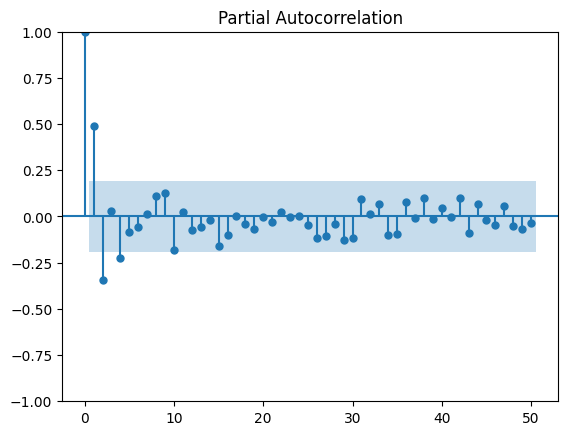

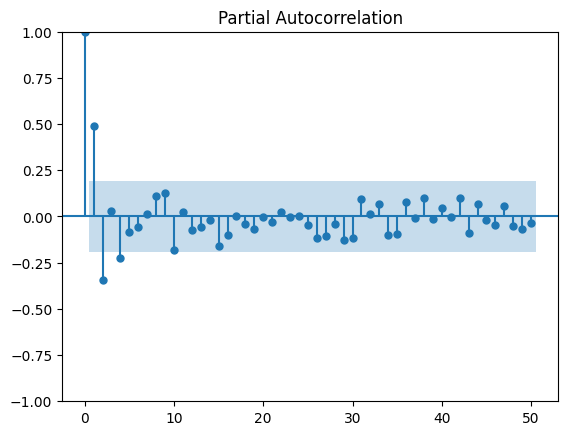

In [ ]:
plot_pacf(df_timeseries_interpolated_diff['vib_spindle'], lags=50)

ADF test --> serve a stimare parametro d --> d = 1 perché abbiamo dovuto differenziare
ACF plot --> serve a stimare q
PACF --> serve a stimare p
i modelli si confrontano sulla base di AIC/BIC

in order to find the best p and q parameters we use a function that tries to use different p and q parameters and finds the best one

In [11]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")

series = df_timeseries_interpolated['vib_spindle']
train_size = int(len(series) * 0.8)  # 80% train, 20% test
train, test = series[:train_size], series[train_size:]

best_aic = np.inf
best_mae = np.inf
best_order = None
best_model = None


for p in range(10):
    for q in range(10):
        try:
            # Fit on training
            model = ARIMA(train, order=(p, 1, q))
            model_fit = model.fit()

            # Forecasting
            forecast = model_fit.forecast(steps=len(test))

            # Error metrics
            mae = mean_absolute_error(test, forecast)
            mse = mean_squared_error(test, forecast)
            rmse = np.sqrt(mse)

            print(f"ARIMA({p},1,{q}) AIC: {model_fit.aic:.2f} | MAE: {mae:.4f} | RMSE: {rmse:.4f}")

            # Use MAE or RMSE to select best model (alternatively, use AIC)
            if mae < best_mae:
                best_mae = mae
                best_order = (p, 1, q)
                best_model = model_fit

        except Exception as e:
            continue

print(f"\nBest ARIMA{best_order} MAE: {best_mae:.4f}")
print(best_model.summary())


ARIMA(0,1,0) AIC: -636.28 | MAE: 0.0048 | RMSE: 0.0062
ARIMA(0,1,1) AIC: -666.39 | MAE: 0.0048 | RMSE: 0.0061
ARIMA(0,1,2) AIC: -664.60 | MAE: 0.0048 | RMSE: 0.0061
ARIMA(0,1,3) AIC: -662.59 | MAE: 0.0048 | RMSE: 0.0061
ARIMA(0,1,4) AIC: -662.47 | MAE: 0.0048 | RMSE: 0.0063
ARIMA(0,1,5) AIC: -661.19 | MAE: 0.0048 | RMSE: 0.0064
ARIMA(0,1,6) AIC: -658.81 | MAE: 0.0048 | RMSE: 0.0063
ARIMA(0,1,7) AIC: -659.40 | MAE: 0.0047 | RMSE: 0.0061
ARIMA(0,1,8) AIC: -658.30 | MAE: 0.0054 | RMSE: 0.0065
ARIMA(0,1,9) AIC: -656.86 | MAE: 0.0048 | RMSE: 0.0063
ARIMA(1,1,0) AIC: -655.62 | MAE: 0.0048 | RMSE: 0.0060
ARIMA(1,1,1) AIC: -664.21 | MAE: 0.0048 | RMSE: 0.0060
ARIMA(1,1,2) AIC: -663.85 | MAE: 0.0047 | RMSE: 0.0057
ARIMA(1,1,3) AIC: -663.52 | MAE: 0.0048 | RMSE: 0.0059
ARIMA(1,1,4) AIC: -660.98 | MAE: 0.0048 | RMSE: 0.0062
ARIMA(1,1,5) AIC: -658.38 | MAE: 0.0048 | RMSE: 0.0063
ARIMA(1,1,6) AIC: -658.85 | MAE: 0.0049 | RMSE: 0.0059
ARIMA(1,1,7) AIC: -657.53 | MAE: 0.0048 | RMSE: 0.0059
ARIMA(1,1,

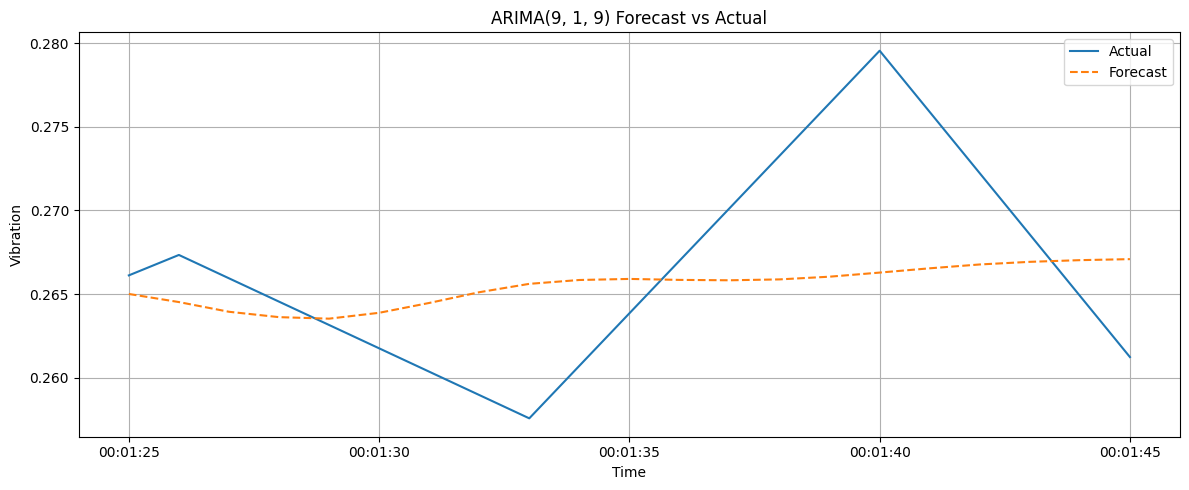

In [12]:
import matplotlib.pyplot as plt

forecast = best_model.forecast(steps=len(test))

plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title(f'ARIMA{best_order} Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Vibration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1) we try to predict the next time steps

2) we visualize the actual trend vs the fit of the model

Visualization of the forecast of the next steps

# SARIMAX ROLLING WINDOw

idea and code adapted from https://medium.com/@poudel.birat25/three-techniques-to-improve-sarimax-model-for-time-series-forecasting-5d48db984fbe

# FINAL MODEL
SARIMAX with rolling window
1. Used the original undifferentiated series
2. rolling window forecast --> rolling forecast with 60 data points, at each step SARIMAX trained on model window, forecast one step ahead (test_size = 1), window moves forward one step
3. SARIMAX(0,1,1)
4. metrics are computed
5. plot: in blue the original undifferentiated series, forecast value is red line

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

MAE: 0.0014
MSE: 0.0000
RMSE: 0.0021
MAPE: 0.53%


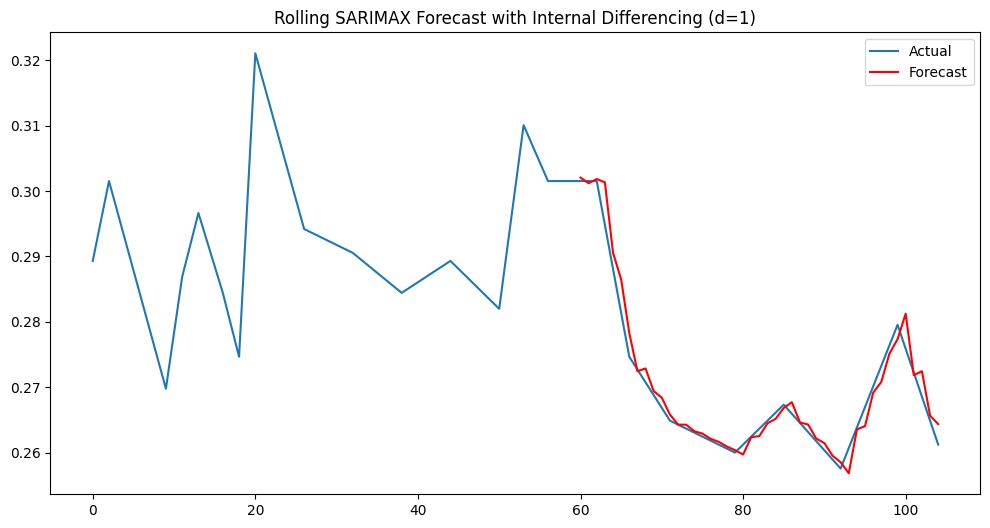

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df_timeseries_interpolated is your original dataframe with 'vib_spindle'

series = df_timeseries_interpolated['vib_spindle'].values
n = len(series)

window_size = 60      # rolling window size for training
test_size = 1         # 1-step ahead forecast
max_start = n - window_size - test_size + 1

all_forecasts = []
all_tests = []

for start in range(max_start):
    train = series[start : start + window_size]
    test = series[start + window_size : start + window_size + test_size]

    # SARIMAX with internal differencing (d=1)
    model = SARIMAX(train, order=(0,1,1))  # MA(1) with one differencing
    results = model.fit(disp=False)

    # Forecast 1 step ahead (on original scale automatically)
    forecast = results.forecast(steps=test_size)

    all_forecasts.extend(forecast)
    all_tests.extend(test)

all_forecasts = np.array(all_forecasts)
all_tests = np.array(all_tests)

# Compute metrics on original scale
mae = mean_absolute_error(all_tests, all_forecasts)
mse = mean_squared_error(all_tests, all_forecasts)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((all_tests - all_forecasts) / all_tests)) * 100

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.2f}%')

# Plot actual vs forecast (align forecast starting at window_size)
plt.figure(figsize=(12,6))
plt.plot(range(n), series, label='Actual')
plt.plot(range(window_size, window_size + len(all_forecasts)), all_forecasts, color='red', label='Forecast')
plt.legend()
plt.title('Rolling SARIMAX Forecast with Internal Differencing (d=1)')
plt.show()


let's compare the rolling SARIMAX with naive prediction from the last value

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Original series
series = df_timeseries_interpolated['vib_spindle'].values
n = len(series)

window_size = 60      # same as SARIMAX window
test_size = 1
max_start = n - window_size - test_size + 1

naive_forecasts = []
naive_actuals = []

for start in range(max_start):
    # Last value from the training window as the prediction
    last_value = series[start + window_size - 1]
    naive_forecasts.append(last_value)

    # True value from the test point
    test_value = series[start + window_size]
    naive_actuals.append(test_value)

# Convert to arrays
naive_forecasts = np.array(naive_forecasts)
naive_actuals = np.array(naive_actuals)

# Evaluate metrics
mae_naive = mean_absolute_error(naive_actuals, naive_forecasts)
mse_naive = mean_squared_error(naive_actuals, naive_forecasts)
rmse_naive = np.sqrt(mse_naive)
mape_naive = np.mean(np.abs((naive_actuals - naive_forecasts) / naive_actuals)) * 100

# Print results
print("📉 Naive Forecast Metrics:")
print(f'MAE:  {mae_naive:.4f}')
print(f'MSE:  {mse_naive:.4f}')
print(f'RMSE: {rmse_naive:.4f}')
print(f'MAPE: {mape_naive:.2f}%')


📉 Naive Forecast Metrics:
MAE:  0.0022
MSE:  0.0000
RMSE: 0.0028
MAPE: 0.81%


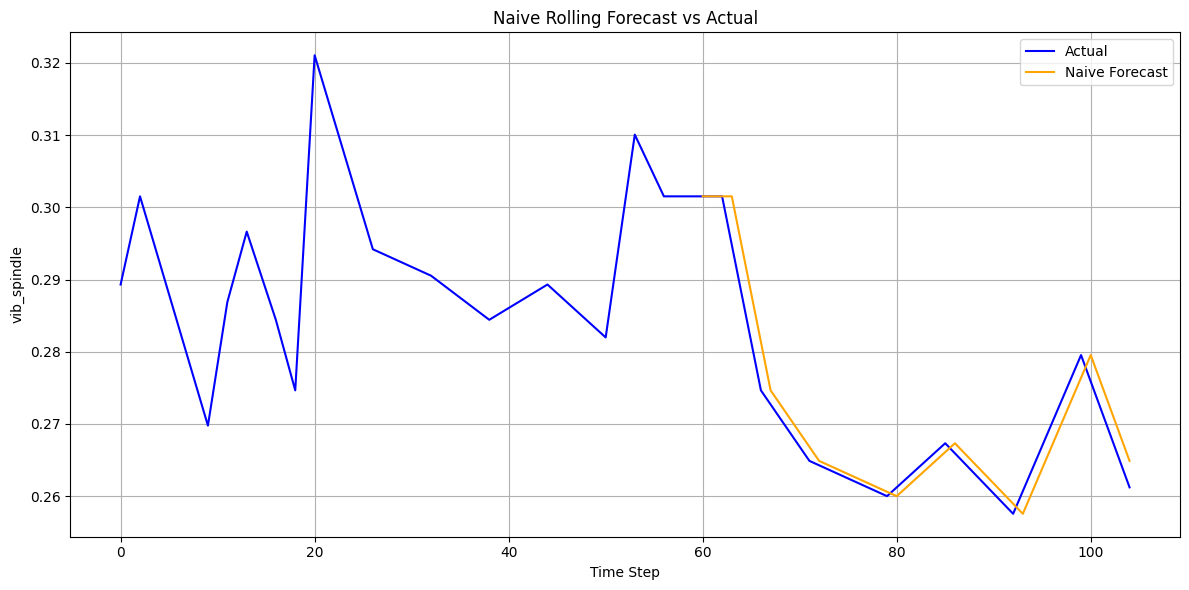

In [ ]:
import matplotlib.pyplot as plt

# Align forecast with time
forecast_start = window_size
forecast_end = forecast_start + len(naive_forecasts)

plt.figure(figsize=(12,6))
plt.plot(series, label='Actual', color='blue')
plt.plot(range(forecast_start, forecast_end), naive_forecasts, label='Naive Forecast', color='orange')
plt.title('Naive Rolling Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('vib_spindle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

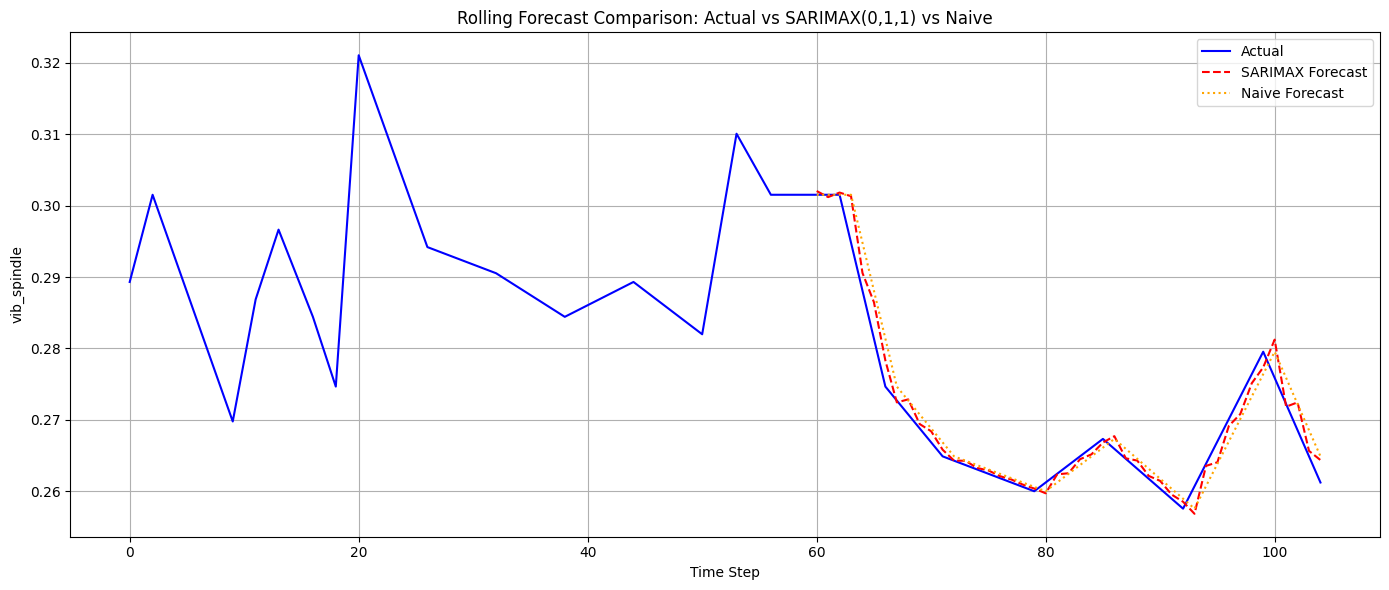

In [ ]:
import matplotlib.pyplot as plt

# Forecast start and end index
forecast_start = window_size
forecast_end = forecast_start + len(all_forecasts)

plt.figure(figsize=(14,6))
plt.plot(series, label='Actual', color='blue', linewidth=1.5)
plt.plot(range(forecast_start, forecast_end), all_forecasts, label='SARIMAX Forecast', color='red', linestyle='--')
plt.plot(range(forecast_start, forecast_end), naive_forecasts, label='Naive Forecast', color='orange', linestyle=':')

plt.title('Rolling Forecast Comparison: Actual vs SARIMAX(0,1,1) vs Naive')
plt.xlabel('Time Step')
plt.ylabel('vib_spindle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# STATE DETECTION - CONTROL CHART

In [ ]:
df_11

,Unnamed: 0,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
71,row_71,11,1,0.00,1,0.75,0.25,1,-0.244141,1.352539,0.070801,0.289307,0.126953,0.164185
72,row_72,11,2,0.04,3,0.75,0.25,1,-0.654297,1.313477,0.070801,0.301514,0.149536,0.181274
73,row_73,11,3,0.07,10,0.75,0.25,1,-0.214844,1.411133,0.070801,0.269775,0.092773,0.121460
74,row_74,11,4,0.07,12,0.75,0.25,1,0.263672,1.391602,0.061035,0.286865,0.098877,0.115356
75,row_75,11,5,0.08,14,0.75,0.25,1,-0.605469,1.342773,0.065918,0.296631,0.121460,0.144653
76,row_76,11,6,0.09,17,0.75,0.25,1,0.341797,1.411133,0.070801,0.284424,0.101929,0.123901
77,row_77,11,7,NaN,19,0.75,0.25,1,0.214844,1.406250,0.068359,0.274658,0.085449,0.101318
78,row_78,11,8,0.12,21,0.75,0.25,1,-0.366211,1.416016,0.065918,0.321045,0.096436,0.115356
79,row_79,11,9,0.16,27,0.75,0.25,1,-0.678711,1.352539,0.063477,0.294189,0.106812,0.127563
80,row_80,11,10,0.18,33,0.75,0.25,1,-0.463867,1.381836,0.070801,0.290527,0.100708,0.122681


In [ ]:
vib = df_11['vib_spindle']
mu = np.mean(vib)
sigma = np.std(vib)
#limiti sup ed inf
upper = mu + 3*sigma
lower = mu - 3*sigma
#print
print("media:",mu)
print("sigma:",sigma)
print("limite superiore:",upper)
print("limite inferiore:",lower)

media: 0.284476902173913
sigma: 0.016383297824512727
limite superiore: 0.33362679564745124
limite inferiore: 0.23532700870037485


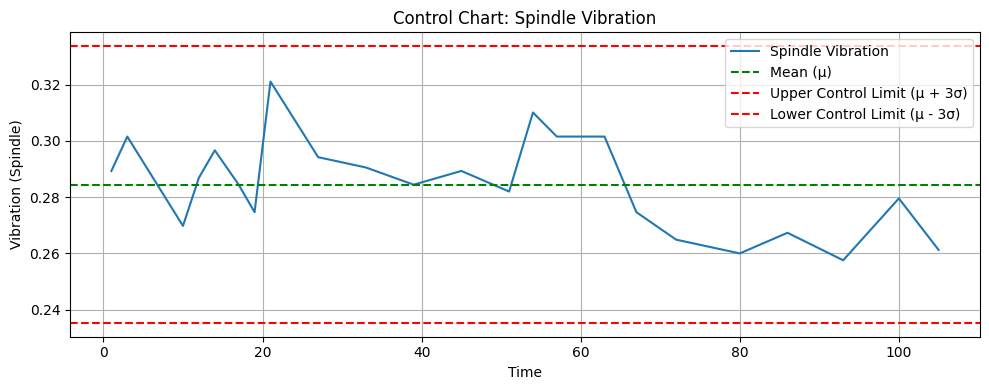

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df_11['time'], vib, label='Spindle Vibration')
plt.axhline(mu, color='green', linestyle='--', label='Mean (μ)')
plt.axhline(upper, color='red', linestyle='--', label='Upper Control Limit (μ + 3σ)')
plt.axhline(lower, color='red', linestyle='--', label='Lower Control Limit (μ - 3σ)')
plt.xlabel('Time')
plt.ylabel('Vibration (Spindle)')
plt.title('Control Chart: Spindle Vibration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

this is as expected: there are no significant deviations, as the test is in the order of seconds. However, the methodology should be employed when observing longer periods of time by VHIT

# Frequency domain: FFT

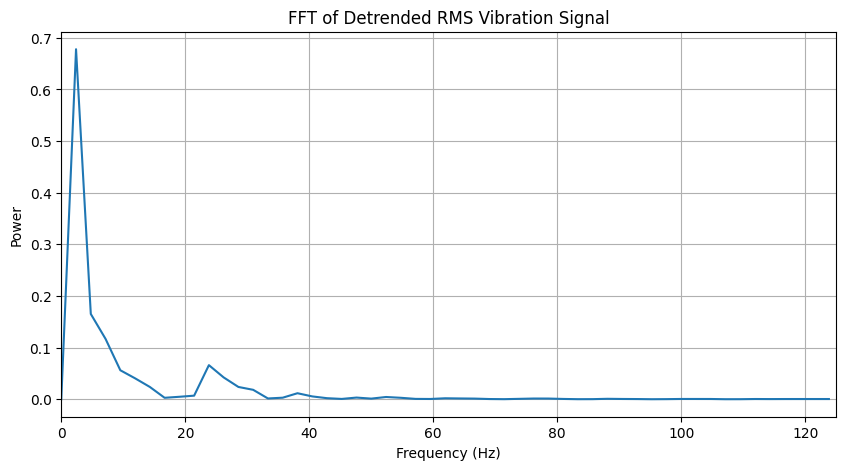

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your original RMS vibration signal
rms_signal = df_timeseries_interpolated['vib_spindle'].values
fs = 250  # sampling frequency in Hz

# Remove DC (mean)
signal_detrended = rms_signal - np.mean(rms_signal)

def plot_fft(signal, fs, title):
    n = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(n, 1/fs)

    pos_mask = fft_freq >= 0
    freqs = fft_freq[pos_mask]
    power = np.abs(fft_vals[pos_mask])**2

    plt.figure(figsize=(10,5))
    plt.plot(freqs, power)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.xlim(0, fs/2)
    plt.grid(True)
    plt.show()

plot_fft(signal_detrended, fs, 'FFT of Detrended RMS Vibration Signal')

dominano frequenze molto basse - non ci sono componenti ad alta frequenza
The spindle vibration is dominated by very low-frequency motion. There is no sign of high-frequency problems, which are often caused by wear, cracks, or chattering.

/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 105, using nperseg = 105
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


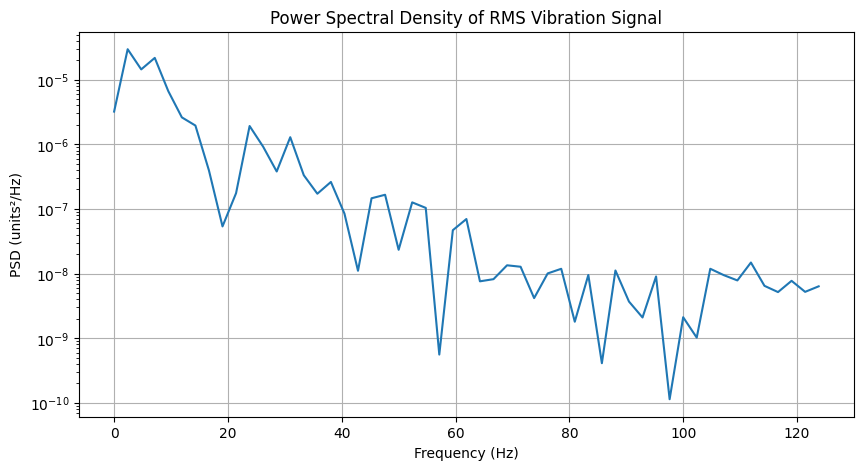

In [ ]:
#power spectral density
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Your original signal (already sampled at fs = 250 Hz)
rms_signal = df_timeseries_interpolated['vib_spindle'].values
fs = 250  # Hz

# Detrend (remove DC component)
signal_detrended = rms_signal - np.mean(rms_signal)

# Welch's method to compute PSD
frequencies, psd = welch(signal_detrended, fs=fs, nperseg=1024)

# Plot PSD
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, psd)  # semilogy gives better visibility
plt.title('Power Spectral Density of RMS Vibration Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (units²/Hz)')
plt.grid(True)
plt.show()